In [15]:
import math, time, sys, os
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [16]:
mass = 460
inertia_G = 200
F = 1500
l0 = 0.8 # Relative distance to the center of gravity

dt = 0.0001
t0 = 0
t1 = 20
t = np.linspace(t0, t1, round(1+(t1-t0)/dt))

theta = np.zeros(len(t))
omega = np.zeros(len(t))
alpha = np.zeros(len(t))
x = np.zeros(len(t))
y = np.zeros(len(t))
vx = np.zeros(len(t))
vy = np.zeros(len(t))

theta0 = 0 #Initial angular displacement
omega0 = 0 #Initial angular velocity
alpha0 = 0 #Initial angular acceleration
x0 = 0 #Initial x displacement
y0 = 0 #Initial y displacement
vx0 = 0 #Initial linear x velocity
vy0 = 0 #Initial linear y velocity

In [17]:
Fx = lambda theta: F*np.cos(theta)
Fy = lambda theta: F*np.sin(theta)

def derrivative(state, t):
    """Takes an array state with entries 0 (x displacement), 1 (y displacement), 2 (), 3 (), 4() and 5 ()        as input and outputs an array with velocity and acceleration"""
    x = state[0]
    y = state[1]
    theta = state[2]

    vx = state[3]
    vy = state[4]
    omega = state[5]

    ay = Fy(theta)/mass
    ax = Fx(theta)/mass
    alpha = (F*l0)/inertia_G
    return [vx, vy, omega, ax, ay, alpha]

result = integrate.odeint(derrivative, [x0, y0, theta0, vx0, vy0, omega0], t)
x_num = result[:,0]
y_num = result[:,1]
theta_num = result[:,2]

vx_num = result[:,3]
vy_num = result[:,4]
omega_num = result[:,5]

In [18]:
print('Moment @ 10 deg = {}'.format(F*l0))
print('Alpha @ 30 deg = {}'.format((F*l0)/inertia_G))
print('ax @ 40 deg = {}'.format(Fx(40*np.pi/180)/mass))
print('ay @ 40 deg = {}'.format(Fy(40*np.pi/180)/mass))

print('Final state: x={}, y={}, theta={}, vx={}, vy={}, omega={}'.format(x_num[-1], y_num[-1], theta_num[-1], vx_num[-1], vy_num[-1], omega_num[-1]) ) 

Moment @ 10 deg = 1200.0
Alpha @ 30 deg = 6.0
ax @ 40 deg = 2.4979710101705805
ay @ 40 deg = 2.0960465533256714
Final state: x=23.595466799304262, y=23.05222427366638, theta=1200.0000000000189, vx=1.1773746353543024, vy=1.152717098099019, omega=119.99999999999467


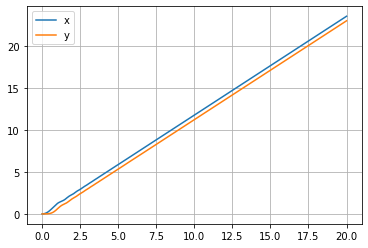

In [19]:
plt.grid()
plt.plot(t, x_num, label='x')
plt.plot(t, y_num, label='y')
plt.legend()

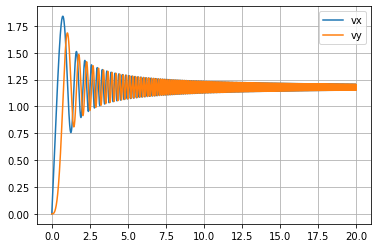

In [20]:
plt.grid()
plt.plot(t, vx_num, label='vx')
plt.plot(t, vy_num, label='vy')
plt.legend()

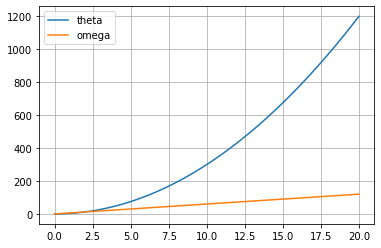

In [21]:
plt.grid()
plt.plot(t, theta_num, label='theta')
plt.plot(t, omega_num, label='omega')
plt.legend()